In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/pc/Desktop/M2GDA/S1/Données_massives/PROJET/Credit_card_fraud.csv")
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [2]:
import os
print(os.getcwd())

C:\Users\pc\Desktop\M2GDA\S1\Données_massives\PROJET


In [3]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


Nous avons pris la decision de réduire le nombre d'observations puisque la base de données avaient au départ un million d'observations que nous avons ramené à mille observations.

In [4]:
df=df.iloc[:1000]
print(df)
df.tail()

     distance_from_home  distance_from_last_transaction  \
0             57.877857                        0.311140   
1             10.829943                        0.175592   
2              5.091079                        0.805153   
3              2.247564                        5.600044   
4             44.190936                        0.566486   
..                  ...                             ...   
995            9.873417                        1.022586   
996          168.091704                        6.304360   
997           44.047622                        0.510298   
998            2.998418                        0.193681   
999           38.133449                        0.167059   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                          1.945940              1.0        1.0   
1                          1.294219              1.0        0.0   
2                          0.427715              1.0        0.0   
3                      

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
995,9.873417,1.022586,0.346643,1.0,0.0,0.0,0.0,0.0
996,168.091704,6.304360,0.416833,1.0,1.0,0.0,0.0,0.0
997,44.047622,0.510298,0.624706,1.0,0.0,0.0,1.0,0.0
998,2.998418,0.193681,0.743416,1.0,1.0,0.0,1.0,0.0
999,38.133449,0.167059,3.965637,1.0,0.0,0.0,1.0,0.0


Analyse descriptives et graphiques

In [5]:
print("Descriptive statistiques")
df.describe()

Descriptive statistiques


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.887864,5.418143,1.656683,0.893000,0.314000,0.117000,0.673000,0.079000
std,63.868699,35.597907,2.349131,0.309268,0.464349,0.321581,0.469352,0.269874
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.006805,0.306441,0.468934,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.346908,0.955936,0.958947,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.467761,3.112754,1.922379,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


Construction du label et des features


In [6]:
X=df.drop(["fraud"], axis=1).values
y=df['fraud'].values

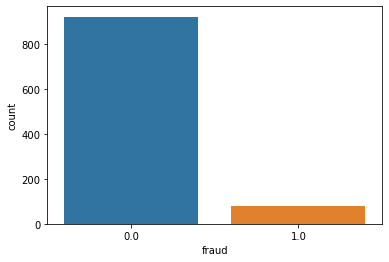

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x = 'fraud',data = df )
plt.show()


Data preprocessing afin de verifier s'il y'a des données manquantes

In [8]:
print('Le nombre de valeur manquant',df.isnull().sum())

Le nombre de valeur manquant distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


Suite à notre data preprocessing, nous constatons qu'il n'ya pas de données manquantes ce qui est une bonne nouvelle pour notre analyse.

Division de la base de données de départ en données d'apprentissages et test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Machine learning apprentissage supervisée


ARBRE DE DECISON

In [10]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[279   1]
 [  1  19]]


Interpretation de la matrice de confusion:
Sur la matrice(1,1), l'algorithme prédit que sur 300 utilisations, l'alogorithme prédit 279 non fraudes.
la matrice(2,1), l'algorithme prédit une fraude alors qu'il y'a pas de fraude
la matrice(1,2), l'algorithme prédit non fraud alors qu'il y'a une fraude
la matrice(2,2), l'algorithme prédit 19 fraudes sur 300 utilisations

<function matplotlib.pyplot.show(close=None, block=None)>

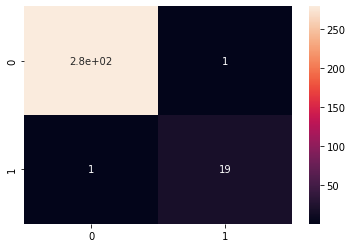

In [12]:
sns.heatmap(cm,annot=True)
plt.show

Graphique de répartition des nombres d'utilisations des cartes de crédit 

In [13]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree: {acc1}")


Accuracy score for Decision Tree: 0.9933333333333333


Le score avec utilisations de l'arbre de decision est de 99,333%

RANDOM FOREST CLASSIFIER

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[277   3]
 [  1  19]]


Interpretation de la matrice de confusion:
Sur la matrice(1,1), l'algorithme prédit que sur 300 utilisations, l'alogorithme prédit 277 non fraudes.
la matrice(2,1), l'algorithme prédit une fraude alors qu'il y'a pas de fraude
la matrice(1,2), l'algorithme prédit non fraud alors qu'il y'a 3 une fraude
la matrice(2,2), l'algorithme prédit 19 fraudes sur 300 utilisations

<function matplotlib.pyplot.show(close=None, block=None)>

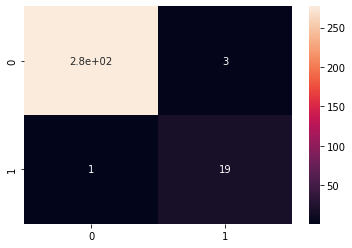

In [16]:
sns.heatmap(cm,annot=True)
plt.show

In [17]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification accuracy: {acc2}")

Random Forest Classification accuracy: 0.9866666666666667


Le credit scoring avec l'utilisation du random forest donne 98,677%, plus faible que l'arbre de decision

CROSS VALIDATION

In [18]:
from sklearn.model_selection import cross_val_score
acc3 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(acc3.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc3.std()*100))

Accuracy: 97.57 %
Standard Deviation: 1.12 %


LE credit scoring avec l'utilisation de la cross validation donne 97,57%, plus faible que l'arbre de decision et le random forest